In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


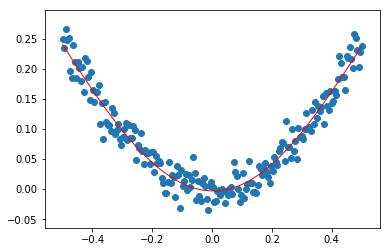

In [4]:
#get random point
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#create two placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#Layer1        y = wx+b
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# output
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#loss function
loss = tf.reduce_mean(tf.square(y-prediction))
#optimizer
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #init it because there are tf.Variable() above
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
#result
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
#plot
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=1)
    plt.show()